#### Import packages

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier


In [3]:
df=pd.read_csv('dr.csv')

In [3]:
df.head()

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


#### Column key:

**ID**: Image ID <br>
**0**: The binary result of quality assessment. 0 = bad quality 1 = sufficient quality <br>
**1**: The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack <br>
**2**: Number of MAs found at the confidence levels alpha = 0.5 <br>
**3**: Number of MAs found at the confidence levels alpha = 0.6 <br>
**4**: Number of MAs found at the confidence levels alpha = 0.7 <br>
**5**: Number of MAs found at the confidence levels alpha = 0.8 <br>
**6**: Number of MAs found at the confidence levels alpha = 0.9 <br>
**7**: Number of MAs found at the confidence levels alpha = 1.0 <br>
**8**: Number of Exudates found at the confidence levels alpha = 0.5 <br>
**9**: Number of Exudates found at the confidence levels alpha = 0.6<br>
**10**: Number of Exudates found at the confidence levels alpha = 0.7 <br>
**11**: Number of Exudates found at the confidence levels alpha = 0.8 <br>
**12**: Number of Exudates found at the confidence levels alpha = 0.9 <br>
**13**: Number of Exudates found at the confidence levels alpha = 1.0 <br>
**14**: Number of Exudates found at the confidence levels alpha = 1.0 <br>
**15**: Number of Exudates found at the confidence levels alpha = 1.0  <br>
**16**: Euclidean distance of the center of the macula and the center of the optic disc <br>
**17**: The diameter of the optic disc <br>
**18**: The binary result of the AM/FM-based classification (amplitude-modulation frequency-modulation) <br>
**19**: Class label. 1 = contains signs of DR, 0 = no signs of DR 

In [5]:
df.columns

Index(['ID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', 'Class'],
      dtype='object')

In [6]:
df.describe()

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,...,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,576.000000,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,...,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,332.409386,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,...,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,288.500000,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,...,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,576.000000,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,...,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,863.500000,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,...,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1151.000000,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,...,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [6]:
df.dtypes

ID         int64
0          int64
1          int64
2          int64
3          int64
4          int64
5          int64
6          int64
7          int64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18         int64
Class      int64
dtype: object

In [4]:
# making a new column with target as category rather than numerical
train_df = df.copy()
y=train_df['Class']

train_df['Disease'] = train_df['Class'].apply(lambda x: (x and 'DR') or 'no_DR')
train_df.head()

,ID,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,Class,Disease
0,1,1,1,22,22,22,19,18,14,49.895756,...,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0,no_DR
1,2,1,1,24,24,22,18,16,13,57.709936,...,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0,no_DR
2,3,1,1,62,60,59,54,47,33,55.831441,...,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1,DR
3,4,1,1,55,53,53,50,43,31,40.467228,...,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0,no_DR
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1,DR


/Users/sonalidasgupta/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


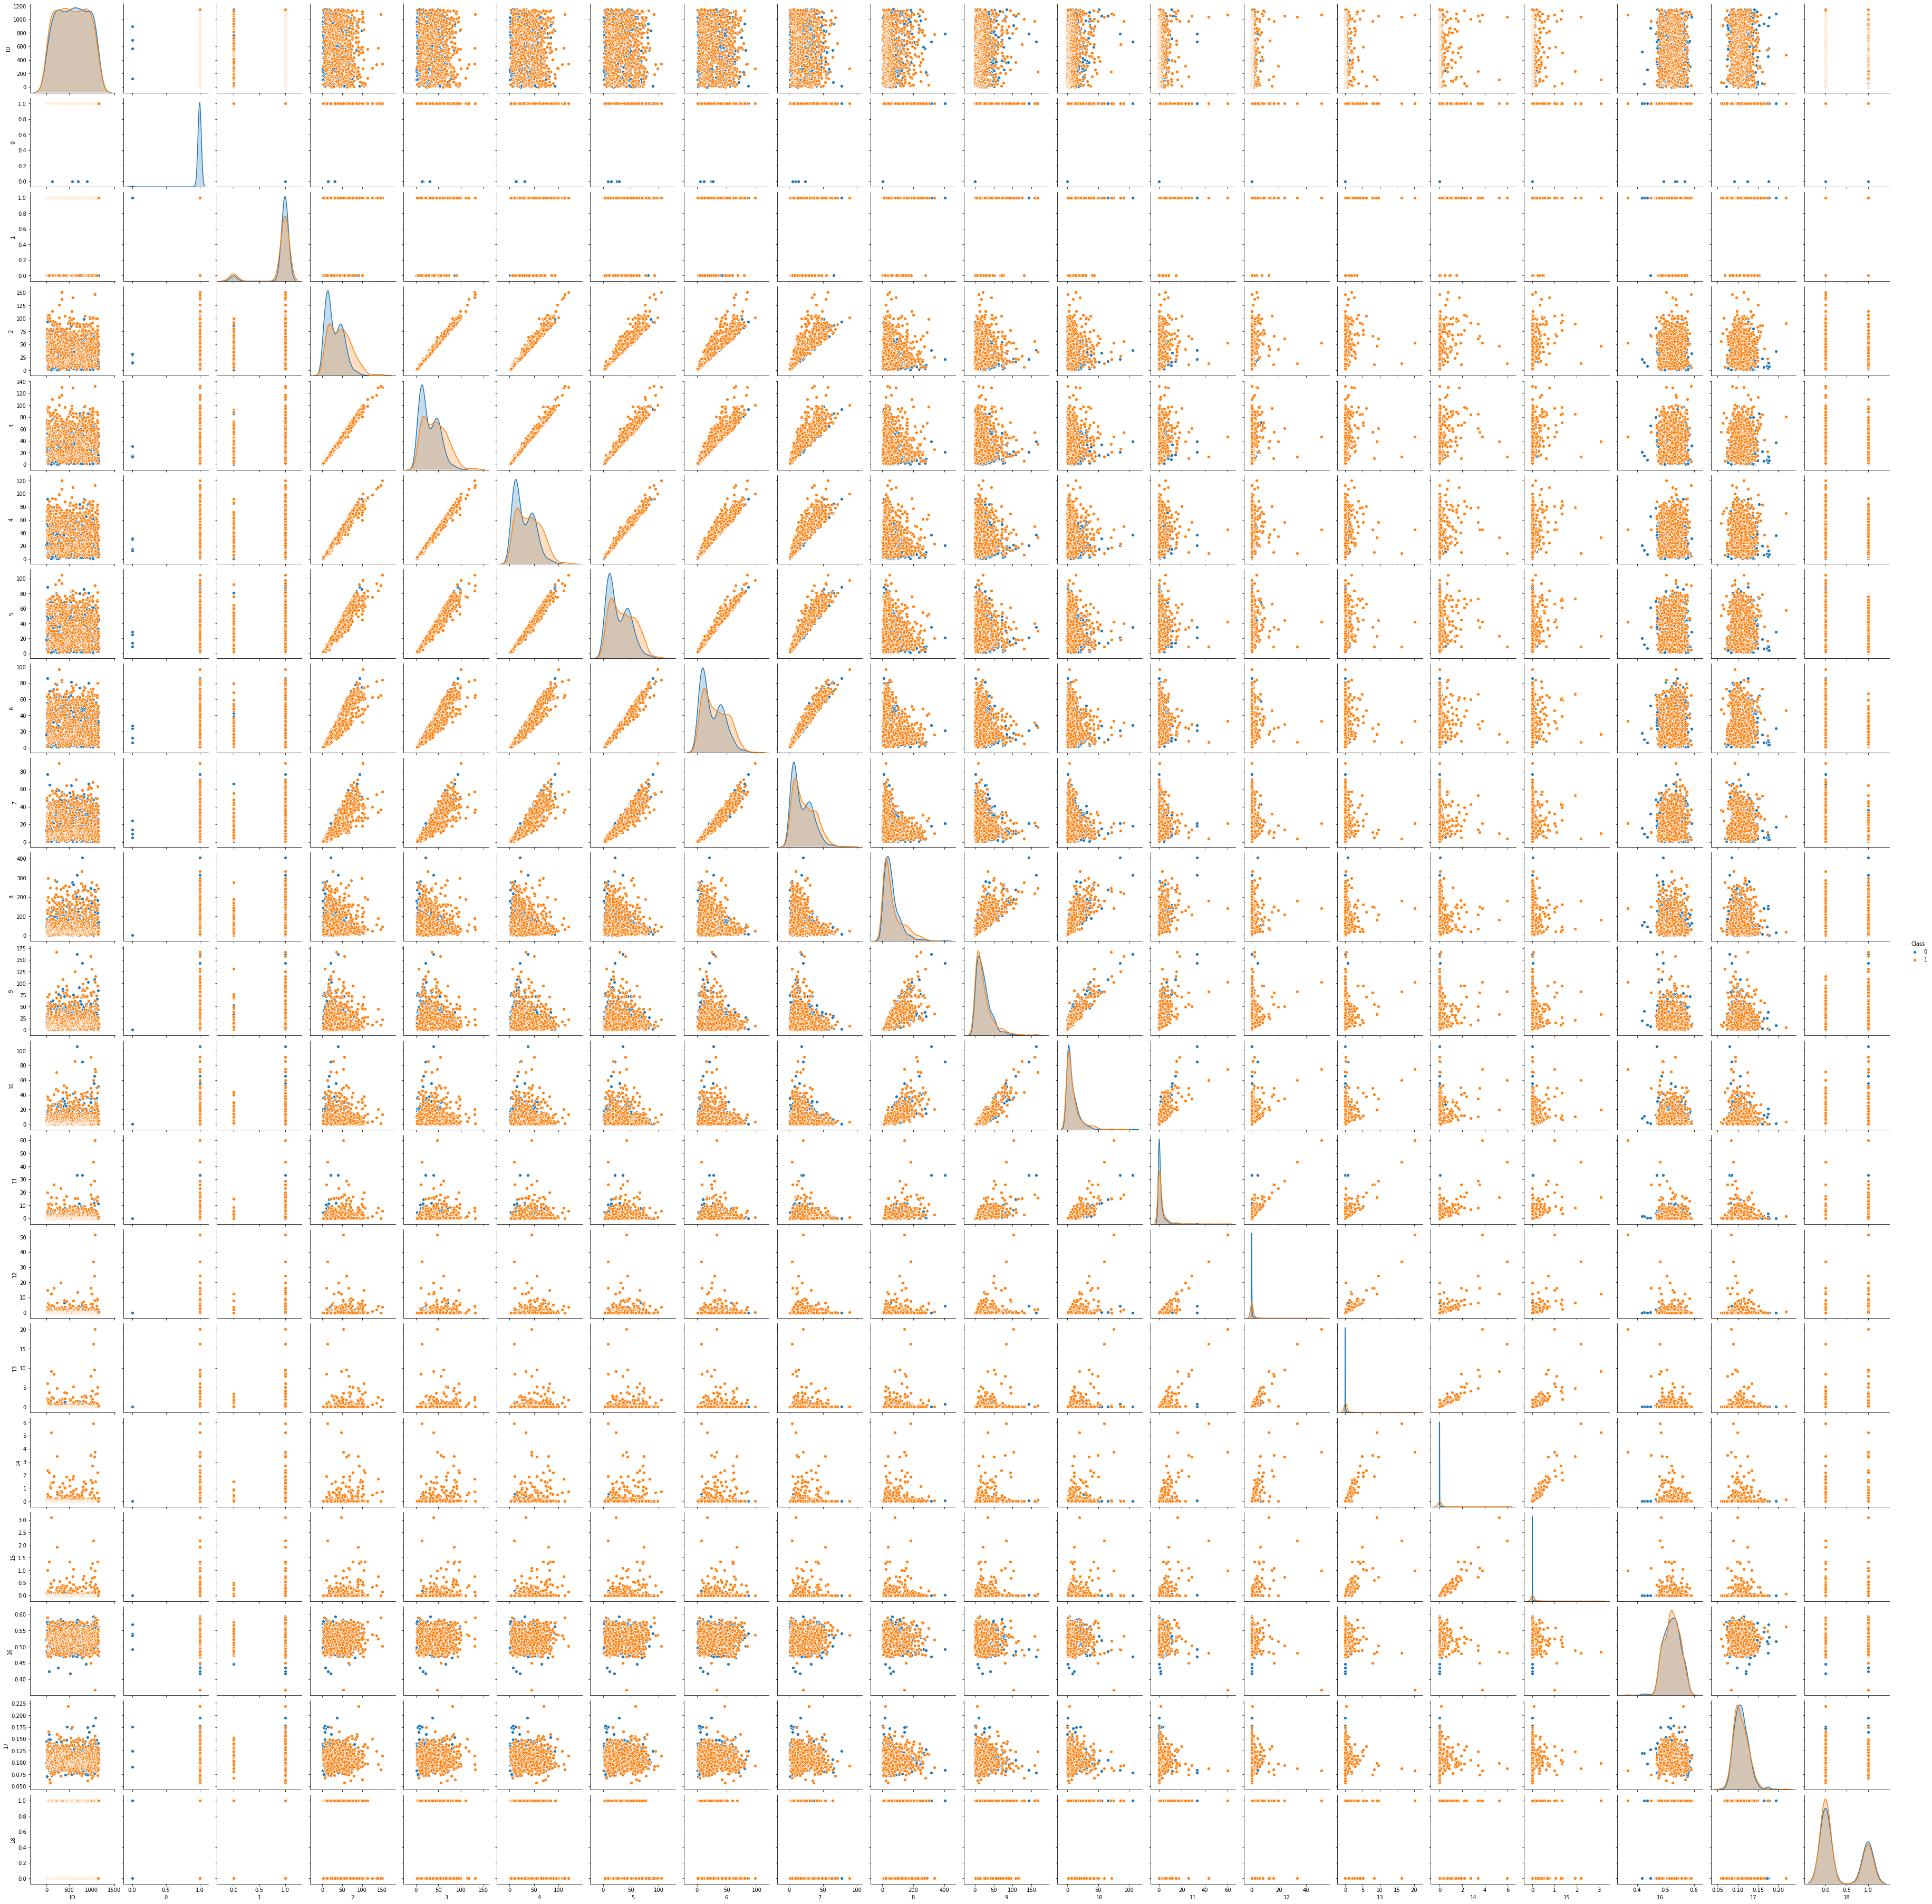

In [35]:
sns.distributions._has_statsmodels = False
sns.pairplot(df, hue='Class');

In [8]:
#Classes are balanced 
#1 means signs of DR
#0 means no signs of DR

df.Class.value_counts()

1    611
0    540
Name: Class, dtype: int64

In [4]:
#Assign X and y from dataset
#Using whole dataset here 

X = df.iloc[:,1:20]
y = df.iloc[:,20]

In [7]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [6]:
#Split data into train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [12]:
lm1 = LogisticRegression(solver= 'liblinear', C=100)
lm1.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#Print accuracy score

print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*lm1.score(X_train, y_train)))

The score for logistic regression is
Training:  75.54%


In [14]:
#Confusion matrix for logistic regresion

predictions = lm1.predict(X_test)
confusion_matrix(y_test, predictions)

array([[87, 16],
       [40, 88]])

In [17]:
print("Testing accuracy score: {:6.2f}%".format(100* lm1.score(X_test, y_test)))
print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions), 
                                                     recall_score(y_test, predictions)))

Testing accuracy score:  75.76%
Precision score: 0.8462,   Recall score: 0.6875


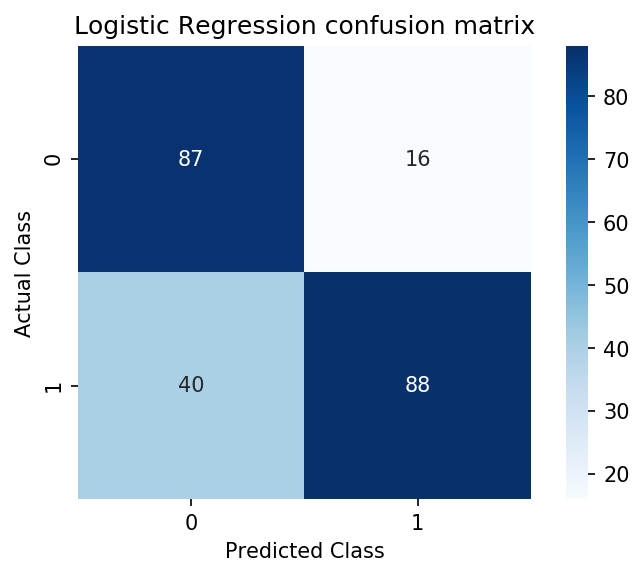

In [37]:
#Print confusion matrix heatmap for logistic regression 

logistic_confusion = confusion_matrix(y_test, lm1.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(logistic_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=[0,1],
           yticklabels=[0,1])

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Logistic Regression confusion matrix');

plt.savefig("confusion_matrix_logit_mvp")

#### kNN 

In [8]:
#KNN on one feature '16'
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))

The score for kNN is
Training:  75.65%


In [9]:
#Confusion matrix for KNN

predictions1 = knn.predict(X_test)
confusion_matrix(y_test, predictions1)

array([[80, 23],
       [54, 74]])

In [18]:
#Test accuracy
#Recall and Precision 

print("Testing accuracy score: {:6.2f}%".format(100* knn.score(X_test, y_test)))

print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions1), 
                                                     recall_score(y_test, predictions1)))

Testing accuracy score:  66.67%
Precision score: 0.7629,   Recall score: 0.5781


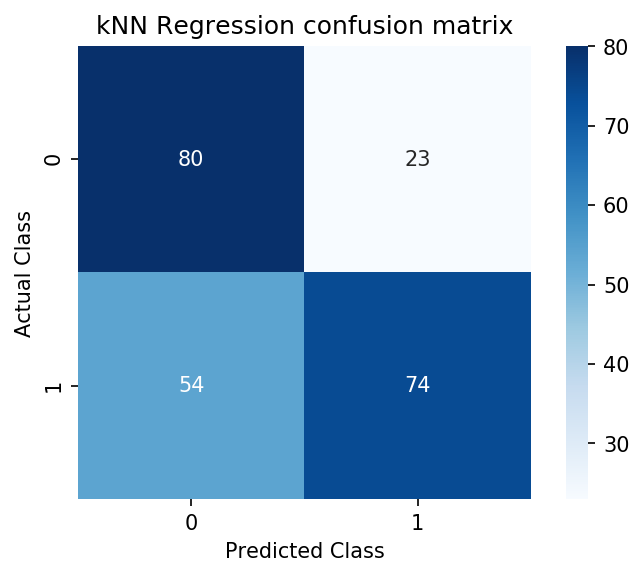

In [38]:
#Print confusion matrix heatmap for KNN
knn_confusion = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=[0,1],
           yticklabels=[0,1])

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('kNN Regression confusion matrix');

plt.savefig("confusion_matrix_knn_mvp")

#### Linear Support Vector Machine (SVM)

In [20]:
#Run linear SVM model on full dataset

linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
linearsvc.score(X_train, y_train)

/Users/sonalidasgupta/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6902173913043478

In [21]:
predictions2 = linearsvc.predict(X_test)
confusion_matrix(y_test, predictions2)

array([[102,   1],
       [ 69,  59]])

In [25]:
print("Testing accuracy score: {:6.2f}%".format(100* knn.score(X_test, y_test)))
print("F1 score: {:6.2f}".format(f1_score(y_test, predictions2)))

Testing accuracy score:  66.67%
F1 score:   0.63


In [13]:
print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions2), 
                                                     recall_score(y_test, predictions2)))

Precision score: 1.0000,   Recall score: 0.4219


#### Decision Trees

In [27]:
#Run Decision trees on full dataset

decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train, y_train)
decisiontree.score(X_train, y_train)

0.6978260869565217

In [28]:
predictions3 = decisiontree.predict(X_test)
confusion_matrix(y_test, predictions3)

array([[72, 31],
       [42, 86]])

In [29]:
print("Testing accuracy score: {:6.2f}%".format(100* decisiontree.score(X_test, y_test)))
print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions3), 
                                                     recall_score(y_test, predictions3)))

Testing accuracy score:  68.40%
Precision score: 0.7350,   Recall score: 0.6719


#### Random Forest

In [30]:
#Run Random Forest on full dataset

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)
randomforest.score(X_train, y_train)

1.0

In [34]:
## ^^score of 1.0 indicates that I may need to tune hyperparameters if I choose this model

In [31]:
predictions4 = randomforest.predict(X_test)
confusion_matrix(y_test, predictions4)

array([[74, 29],
       [44, 84]])

In [32]:
print("Testing accuracy score: {:6.2f}%".format(100* randomforest.score(X_test, y_test)))

print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions4), 
                                                     recall_score(y_test, predictions4)))

Testing accuracy score:  68.40%
Precision score: 0.7434,   Recall score: 0.6562


#### Naive Bayes-Gaussian

In [36]:
#Run Naive Bayes on full dataset
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy score: {:6.4f}".format(nb.score(X_train, y_train)))

#Confusion Matrix

predictions5 = nb.predict(X_test)
print(confusion_matrix(y_test, predictions5))

#Precision and Recall Scores 

print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions5), 
                                                     recall_score(y_test, predictions5)))

print("Testing accuracy score: {:6.2f}%".format(100* nb.score(X_test, y_test)))

Accuracy score: 0.6065
[[95  8]
 [92 36]]
Precision score: 0.8182,   Recall score: 0.2812
Testing accuracy score:  56.71%


#### Naive Bayes-Bernoulli

In [37]:
#Run Bernoulli NB

nb1 = BernoulliNB()
nb1.fit(X_train, y_train)
print("Accuracy score: {:6.4f}".format(nb1.score(X_train, y_train)))

#Confusion Matrix

predictions6 = nb1.predict(X_test)
print(confusion_matrix(y_test, predictions6))

#Precision and Recall Scores 

print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions6), 
                                                     recall_score(y_test, predictions6)))

print("Testing accuracy score: {:6.2f}%".format(100* nb1.score(X_test, y_test)))

Accuracy score: 0.5717
[[75 28]
 [69 59]]
Precision score: 0.6782,   Recall score: 0.4609
Testing accuracy score:  58.01%


#### Naive Bayes-Multinomial 

In [38]:
#Run Multinomial NB

nb2 = MultinomialNB()
nb2.fit(X_train, y_train)
print("Accuracy score: {:6.4f}".format(nb2.score(X_train, y_train)))

#Confusion Matrix

predictions7 = nb2.predict(X_test)
print(confusion_matrix(y_test, predictions7))

#Precision and Recall Scores 

print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, predictions7), 
                                                     recall_score(y_test, predictions7)))

print("Testing accuracy score: {:6.2f}%".format(100* nb2.score(X_test, y_test)))

Accuracy score: 0.5717
[[47 56]
 [44 84]]
Precision score: 0.6000,   Recall score: 0.6562
Testing accuracy score:  56.71%
